In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#pathway to dataframes
path = r'C:\Users\ajkap\Instacart Basket Analysis'

In [3]:
#Importing df_merged_clean pickle file
df_merged_clean = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customer_merge_.pkl'))

# Question 2. On workbook 4.9 Practice.ipynb which is attached separately from work in the task

# Question 3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
In a markdown cell beneath/ your histogram, describe what the histogram demonstrates.

In [21]:
#Integrity Check
df_merged_clean['order_hour_of_day'].describe()

count    3.240604e+07
mean     1.342515e+01
std      4.246382e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.600000e+01
max      2.300000e+01
Name: order_hour_of_day, dtype: float64

Text(0, 0.5, 'Frequency')

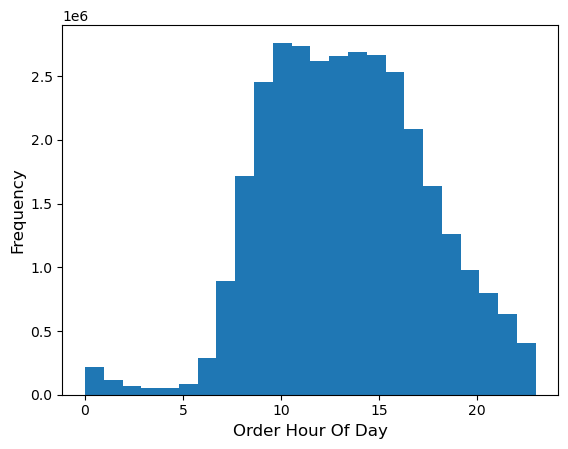

In [81]:
###Histogram of the order_hour_of_day column
hist = df_merged_clean['order_hour_of_day'].plot.hist(bins = 24)
plt.xlabel("Order Hour Of Day", fontsize=12)
plt.ylabel("Frequency",fontsize=12)

###Explani The histogram demonstrates Instacart's hours of the day where their orders are the highest. It shows that orders start peacking around 7am and stay high until 10am. They also maintain busy hours until about 4pm. After that, orders start steadily decreasing until they are out their lowest at 12am. 

# Question 4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

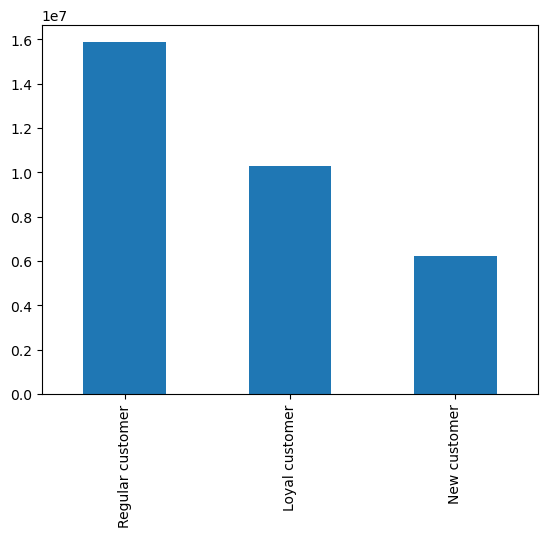

In [94]:
#Bar chart of 'loyalty_flag' column
bar_loyalty_flag = df_merged_clean['loyalty_flag'].value_counts().plot.bar()

### Regular customers make up the most of all customers on Instacart

# Question 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [11]:
#Creating accurate subset for line chart
np.random.seed(4)
dev = np.random.rand(len(df_merged_clean)) <= 0.7

In [12]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [13]:
#Store 70% of sample in dataframe big
big = df_merged_clean[dev]

In [15]:
#Store 30% of sample in dataframe small
small = df_merged_clean[~dev]

In [16]:
#Checking number of rows in dataframe
len(df_merged_clean)

32406041

In [17]:
len(big)+len(small)

32406041

In [18]:
#Create a subset only containing columns 'prices' and 'order hour of day'
df_2 = small[['prices', 'order_hour_of_day']]

In [19]:
df_merged_clean.loc[df_merged_clean['prices'] >100, 'prices'] = np.nan

In [20]:
df_merged_clean['prices'].max()

25.0

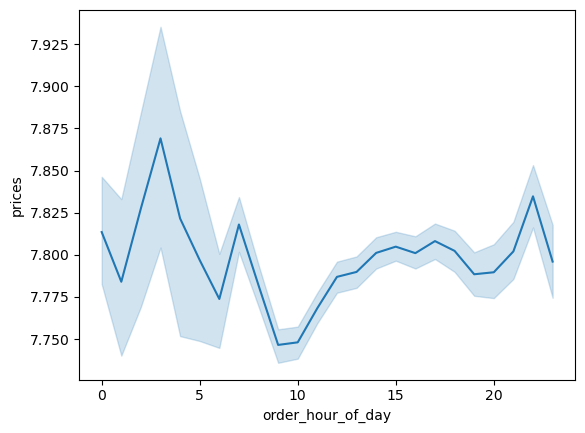

In [21]:
#Create a line chart
line_hour_price = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

## Based off of the line chart alone, it shows that morning hours are the busiest for customer orders. After that, there does not seem to be a clear relation to price of an item and the hour it is purchased.

# Question 6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents: In a markdown cell beneath your line chart, describe what the line chart shows.


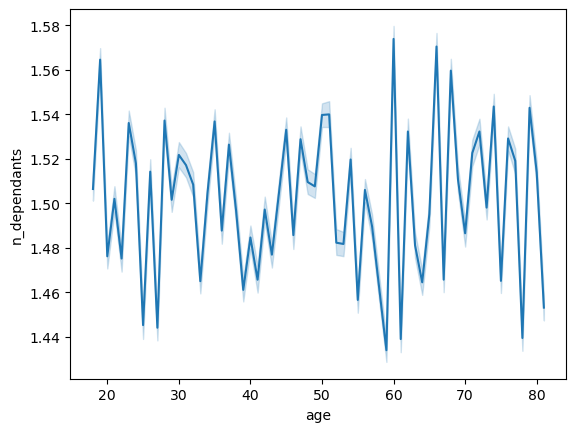

In [110]:
#Create a line chart of age and number of dependents
line_dependents_age = sns.lineplot(data = df_2, x = 'age',y = 'n_dependants')

## Looking at this line chart, there does not seem to be a connection between age and number of dependents. 

# Question 7. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function. In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

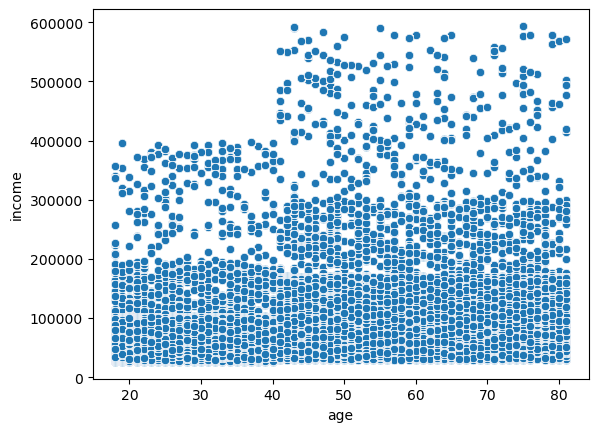

In [112]:
#Create scatterplot of age and income
scatter_age_income = sns.scatterplot(x = 'age', y = 'income',data = df_merged_clean)

## The scatterplot shows that customers at the age of 40 and older have higher incomes than customers under 40. 

# Question 8 Exporting and saving all visualizations to Analysis Folder Under Visualizations

In [84]:
#Exporting histogram orders_hour_of_day
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

In [95]:
#Exporting bar_loyalty_flag
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [22]:
#Exporting line chart line_hour_price
line_hour_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hour_price.png'))

In [111]:
#Exporting line chart line_age_dependents
line_dependents_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_dependents_age.png'))

In [114]:
#Exporting Scatterplot scatter_age_income
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))

In [23]:
#Exporting cleaned data
df_merged_clean.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_merged_aggregated_2_.pkl'))